# Data Wrangling with Pandas

Now we will explore some advanced features of Pandas.

In [3]:
import pandas as pd
import numpy as np

## Merging and joining DataFrame objects

Merge or join operations combine dataframes by joining rows using one or more keys.

Think of merge as aligning on columns.

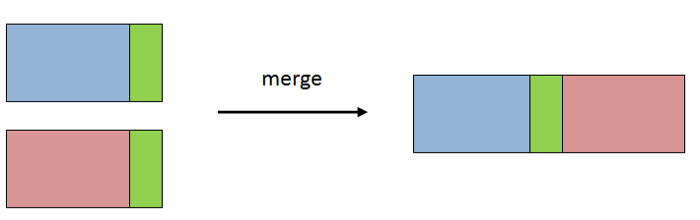  
[Image taken from towardsdatascience.com](https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59)

In [4]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b','d',], 
                    'data2': range(3)})
df1

key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6

In [5]:
df2

key  data2
0   a      0
1   b      1
2   d      2

When not specified merge uses overlapping column name as the keys.

In [6]:
pd.merge(df1, df2)

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

In [7]:
pd.merge(df1, df2, on='key')

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

If the column names are differnet in each dataframe, then we can specify them separately. 

In [8]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                    'data1': range(7)})

df4 = pd.DataFrame({'rkey': ['a', 'b','d',], 
                    'data2': range(3)})

In [9]:
df3

lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6

In [7]:
df4

rkey  data2
0    a      0
1    b      1
2    d      2

In [8]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

lkey  data1 rkey  data2
0    b      0    b      1
1    b      1    b      1
2    b      6    b      1
3    a      2    a      0
4    a      4    a      0
5    a      5    a      0

Note that 'c', 'd', and data associated with them are missing. This is the default behaviour of `merge` which performs an **'inner'** join that results in intersection of keys. 

Other options to join are **'left'** and **'right'**

In [10]:
pd.merge(df1, df2, how='left')

key  data1  data2
0   b      0    1.0
1   b      1    1.0
2   a      2    0.0
3   c      3    NaN
4   a      4    0.0
5   a      5    0.0
6   b      6    1.0

In [11]:
pd.merge(df1, df2, how='right')

key  data1  data2
0   a    2.0      0
1   a    4.0      0
2   a    5.0      0
3   b    0.0      1
4   b    1.0      1
5   b    6.0      1
6   d    NaN      2

In [13]:
pd.merge(df1, df2, how='outer')

key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0

**'outer'** join takes the union of the keys, which combines the result of the **'left'** and **'right'** joins.

We can merge with multiple keys by passing a list of columns:

In [12]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 
                   'key2': ['one', 'two', 'one'],
                   'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0

Occasionally, there will be columns with the same name in both tables that we do not wish to merge as they may contain different information despite having the same name. 

In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [13]:
pd.merge(left, right, on='key1')

key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7

This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right dataframes, respectively.

In [14]:
pd.merge(left, right, on='key1', suffixes=('_l', '_r'))

key1 key2_l  lval key2_r  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7

#### Pass indexes of one of the DataFrames as keys

In [15]:
right

key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7

Set key1 as the index.

In [16]:
right_in = right.set_index('key1')
right_in

key2  rval
key1           
foo   one     4
foo   one     5
bar   one     6
bar   two     7

In [17]:
left

key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3

Use index of right_in and key1 of left to merge the two dataframes.

In [18]:
pd.merge(left, right_in, left_on=['key1'], right_index=True)

key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
0  foo    one     1    one     5
1  foo    two     2    one     4
1  foo    two     2    one     5
2  bar    one     3    one     6
2  bar    one     3    two     7

### **join** is used to merge by index:

In [19]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], 
                  index=['a', 'c', 'e'],
                  columns=['Ohio', 'Nevada'])

right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], 
                   columns=['Missouri', 'Alabama'])
left2.join(right2, how='outer')

Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0

## Concatenation

Concatenation, binding, or stacking all refer to the same data combination operation. For Pandas objects, Series and DataFrames, the presence of labelled axes permits generalised array concatenation. In order to perform concatenation, we need to think about:

1. Are the axes indexed differently, and should they make a union or intersection of the axes?
2. Do we need to identify groups in the resulting onject?

### Union or intersection
Let's say we have three Series without any index overlap:

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

We can call `Concat` to glue these objects together into a list.

In [ ]:
pd.concat([s1, s2, s3])

By default, `Concat` has stacked the three Series, along the axis=0, into another Series. However, what if we pass axis=1:

In [ ]:
pd.concat([s1, s2, s3], axis=1)

Now, we get a DataFrame. As there were no overlap on the other axis (axis=0), thus the other axis can be seen as the union or 'outer' join of the indexes.


In [ ]:
s4 = pd.concat([s1 * 4, s2])
s4

In [ ]:
pd.concat([s1, s4], axis=1)

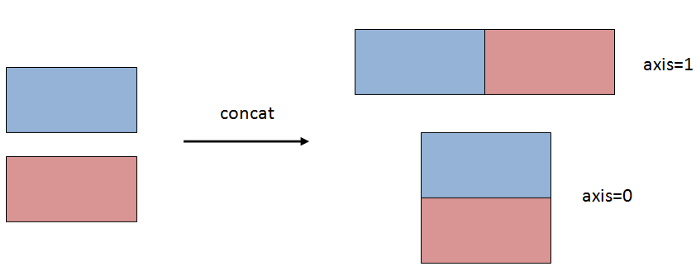
[Image taken from towardsdatascience.com](https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59)

To intersect, we should pass `join=inner`.

In [ ]:
pd.concat([s1, s4], axis=1, join='inner')

We can also control which axes are to be used with `join_axes`:

### Retaining identity

It is possible that the concatenated pieces cannot be idendified in the result. 

To ensure proper identification of elements, we can create a hierarchical index with the `keys` argument:

In [ ]:
retain_id = pd.concat([s1, s1, s3], keys=['first', 'second', 'third'])
retain_id

In [ ]:
retain_id.unstack()

When we combine along `axis=1`, the `keys` argument passes column headers for the resulting DataFrame":

In [ ]:
pd.concat([s1, s1, s3], axis=1, keys=['first', 'second', 'third'])

This also extends to DataFrames:

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), 
                index=['a', 'b', 'c'],
                columns=['one', 'two'])
df1

In [ ]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),
                index=['a', 'c'],
                columns=['three', 'four'])
df2

In [ ]:
pd.concat([df1, df2], axis=1, keys=['first', 'second'])

#### Excercise: Make a list of all the other additional arguments that can be passed to the `concat` operation and explaing their role.

## Comibinig data that overlaps

Let's say you and your friend are required to finish an assignment that has ten parts. Although you are a team,  still you are to be scored individually. You both decided to perform this task individually knowing fully well that time is limited. You could only finish seven parts, and your friend has finished nine parts. However, you do not fully trust the problem-solving skills of your friend. Hence, you decided to copy only the answers to the sections that you did not finish. 

In [ ]:
Yours = pd.Series([10, 23, 57, 65, 88, 97, 203, np.nan, np.nan, np.nan], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
Yours

In [ ]:
Friends = pd.Series([10, 23, 59, 65, 82, 97, 203, 0, 29, np.nan], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
Friends

### combine_first
We can use the `combine_first` method to just copy those answers that are null in your assignment.

In [ ]:
Yours.combine_first(Friends)

If this were to happen on subsequent days, then we can make DataFrame for each day and `combine_first`  method will perform the same action in a column-wise manner on the DataFrame.

In [ ]:
YourDf = pd.DataFrame({'Day1':[10, 23, 57, 65, 88, 97, 203, np.nan, np.nan, np.nan],
                      'Day2':[20, 54, 99, 107, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]},
                      index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
YourDf

In [ ]:
FriendDf = pd.DataFrame({'Day1':[10, 23, 59, 65, 82, 97, 203, 0, 29, np.nan],
                      'Day2':[20, 54, 95, 107, 36, 55, 109, np.nan, np.nan, np.nan]},
                      index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
FriendDf

In [ ]:
YourDf.combine_first(FriendDf)

## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

The follwing dataset is from the Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomised controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [ ]:
cdystonia = pd.read_csv("./data/cdystonia.csv", index_col=None)
cdystonia

This dataset contians repeated measurements of the same patients (longitudinal data). Such information can be presented in (at least) two ways: showing each repeated measurement in its own row, or in multiple columns representing multiple measurements.


### stack and unstack
The `stack` method rotates the data frame so that columns are represented in rows:

In [ ]:
stacked = cdystonia.stack()
stacked

To complement this, `unstack` pivots from rows back to columns.

In [ ]:
stacked.unstack().head()

Here, it makes sense to make a hierarchical index including the patient and observation:

In [ ]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

In [ ]:
cdystonia2.index.is_unique

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [ ]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

In [ ]:
cdystonia[['patient','site','id','treat','age','sex']].head()

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects.

In [ ]:
cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates().head()

In [ ]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner')
                  .head())
cdystonia_wide

A cleaner way of achieving the same is by setting the patient-specific information as an index prior to unstacking:

In [ ]:
(cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs']
     .unstack('week').head())

### melt

We can convert the "wide" format back to long with the `melt` function. 

`melt` function is useful for DataFrames having one or more columns as identifier variables (`id_vars`), and the remaining columns as measured variables (`value_vars`). 


In [ ]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

The measured variables were "unpivoted" to the row axis, leaving just two non-identifier columns, a *variable* (renamed `obs`) and its corresponding *value* (renamed `twsters`), which can also be renamed using optional arguments.

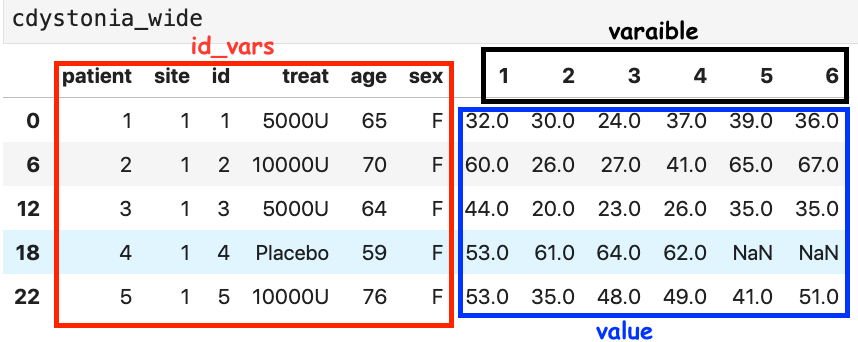

This illustrates the **long** and the **wide** formats. Its  better to store data in the long format as furhter data can be added rows in the database.

## Pivoting

The `pivot` method allows a DataFrame to switch between long and wide formats. 

It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [ ]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [ ]:
cdystonia.pivot('patient', 'obs')

### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [ ]:
cdystonia.treat.value_counts()

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [ ]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [ ]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [ ]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

In [ ]:
np.log(vals)

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [ ]:
vals = vals.replace(0, 1e-6)
np.log(vals)

We can also perform the same replacement that we used `map` for with `replace`:

In [ ]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

## Categorical Data

Pandas provides a data type for reprsenting categorical (factor) data, called `category`. 

For example, the `treat` column in the cervical dystonia dataset represents three treatment levels in a clinical trial, and is imported by default as an `object` type, since it is a mixture of string characters.

In [ ]:
cdystonia.treat.dtype

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [ ]:
pd.Categorical(cdystonia.treat)

In [ ]:
cdystonia['treat'] = cdystonia.treat.astype('category')

In [ ]:
cdystonia.treat.dtype

By default the Categorical type represents an unordered categorical.

### Discretisation

Pandas `cut` operation can be used to group continuous or countable data in to bins. 

Discretisation is in general a **bad idea** for statistical analysis, so mind this function!

Lets bin the ages of the cervical dystonia patients into a number of groups:

In [ ]:
cdystonia.age.describe()

We can transform these data into decades, starting with individuals in their 20's and upto those in their 80's:

In [ ]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

The parentheses are for an open interval, meaning that the interval only includes values up to the refered point, but *not* the point itself.

The square bracket indicates a closed interval, where the refered point is ialso ncluded in the interval. 

We can switch theis closure from the right to the left side by passing the `right` flag as `False`:

In [ ]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [ ]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:30]

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [ ]:
pd.qcut(cdystonia.age, 4)[:30]

Alternatively, one can specify custom quantiles to act as cut points:

In [ ]:
quantiles = pd.qcut(cdystonia.age, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

Note that you can easily combine discretiztion with the generation of indicator variables shown above:

### Sampling

For certain data analysis tasks, such as running simulations, we need to randomly draw values from our data. 

`DataFrame` and `Series` objects have a `sample` method that can be used to draw random samples, with or without replacement:

In [ ]:
cdystonia_wide.sample(n=5)

In [ ]:
cdystonia_wide.sample(n=6)

In [ ]:
cdystonia_wide.sample(n=6, replace=True)

## Data aggregation and transformation with the GroupBy operations

**GroupBy** functionality is one of the most powerful Pandas feature. It allows us to easily perform operations on *groups* or *subset* of observations within a dataset. For exmaple:

1. **aggregation**: Such as calculating the mean of each group. This requires applying a function to each group and then returning the aggregated results.
2. **slicing** the DataFrame into groups and then performing an operation or a set of operations, like plotting the resulting slices.
3. group-wise **transformation**, such as standardisation/normalisation

In [ ]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [ ]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [ ]:
n = 0
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('**********************group**********************\n',
          group, '\n')
    n += 1
    if n > 2: break

A common data analysis protocol is the **split-apply-combine** operation, which groups of data subsets, applies an aggregation function to the groups, then joins them back into a new data table.

For example, we may want to aggregate our data with with some function.

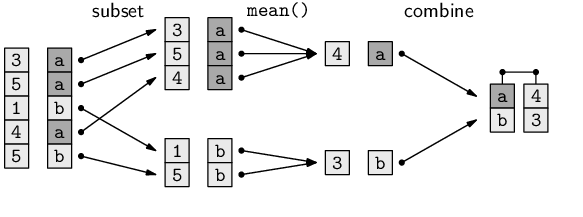
[figure taken from "Learning pandas - Second Edition by Michael Heydt"](https://learning.oreilly.com/library/view/learning-pandas-/9781787123137/53234dc7-6feb-4695-98d1-19f017ddb8ca.xhtml)

We can aggregate in Pandas with the `aggregate` (`agg`) method:

In [ ]:
cdystonia_grouped.agg(np.mean).head()

Note that the `treat` and `sex` variables were not aggregated. 

Pandas knows that it non-sensesical to aggregate non-string variables, hence these columns are simply ignored by the method.

For some common aggregation functions Pandas has a in-built method, such as `mean`:

In [ ]:
cdystonia_grouped.mean().head()

The `add_prefix` and `add_suffix` methods are used to give the resulting table meaningful column labels:

In [ ]:
cdystonia_grouped.mean().add_suffix('_mean').head()

We can also aggregate according to multiple keys:

In [ ]:
cdystonia.groupby(['week','site']).mean().head()

We can **transform** our data, with a function of our choice using the `transform` method:

In [ ]:
normalise = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalise).head()

We can also select columns within the `groupby` operations, to perfrom the split-apply-combine operations only on a subset of columns:

In [ ]:
cdystonia_grouped['twstrs'].mean().head()

In [ ]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

By default, `groupby` groups the rows, but we can change this using the `axis` argument.

We also group by one or more levels of a hierarchical index.

In [196]:
cdystonia2.head(10)

week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [197]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

### Apply

We can generalise the split-apply-combine method by using `apply` function. This allows us to perform any function on a grouped dataset and join them into a new DataFrame.

The following function takes a DataFrame, one of its columns name, and an integer `n` (default = 5) as arguments. Then sorts the dataframe by the column, and takes the `n` largest values of that column. 

We can use this function with `apply` to get the largest `n` values from every group of a DataFrame in a single call. 

In [198]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, say we wanted to return the 3 highest twstrs recoreded in each week:

In [210]:
top3twstrs = cdystonia2.groupby(['week']).apply(top, column='twstrs', n=3)
top3twstrs.head(n=15)

week  site  id    treat  age sex  twstrs
week patient obs                                          
0    106     1       0     9   8    5000U   43   M      67
     21      1       0     2   9    5000U   47   F      67
     23      1       0     2  11   10000U   53   F      65
2    21      2       2     2   9    5000U   47   F      64
     106     2       2     9   8    5000U   43   M      63
     4       2       2     1   4  Placebo   59   F      61
4    106     3       4     9   8    5000U   43   M      71
     21      3       4     2   9    5000U   47   F      65
     4       3       4     1   4  Placebo   59   F      64
8    100     4       8     9   2  Placebo   59   M      68
     106     4       8     9   8    5000U   43   M      66
     17      4       8     2   5   10000U   45   F      64
12   106     5      12     9   8    5000U   43   M      68
     17      5      12     2   5   10000U   45   F      67
     49      5      12     5   3    5000U   65   F      67

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney

[Advanced Statistical Computing at Vanderbilt University's Department of Biostatistics](http://mybinder.org:/repo/fonnesbeck/bios8366)